# 성별, 몸무게 예측

- 성별을 분류하는 예측모델 (선형모델과 트리 모델 비교)
- 몸무게를 예측하는 회귀모델 (선형 모델과 트리 모델 비교)
- 타이타닉 생존자 예측 모델 (선형 모델과 트리 모델 비교)

## 결정 트리
- 분류(classification)와 회귀에 사용된다

- 랜덤 포레스트로 성능 향상

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier

## 남여 키, 몸무게, 성별 데이터

In [3]:
data = pd.read_csv("https://github.com/data-labs/data/raw/main/weight-height.csv")
print(data.shape)
data[:5]

(10000, 3)


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# 성별 인코딩, 단위 변환 (인치, 파운드 --> cm, kg)
data.Gender = data.Gender.map({'Male':0, 'Female':1})
data.Height = data.Height*2.54 # cm
data.Weight = data.Weight*0.453592 # kg
data[:5]

,Gender,Height,Weight
0,0,187.571423,109.720985
1,0,174.706036,73.622732
2,0,188.239668,96.497550
3,0,182.196685,99.809504
4,0,177.499761,93.598619


In [5]:
# 사본 사용 (원본 백업)
df = data.copy()

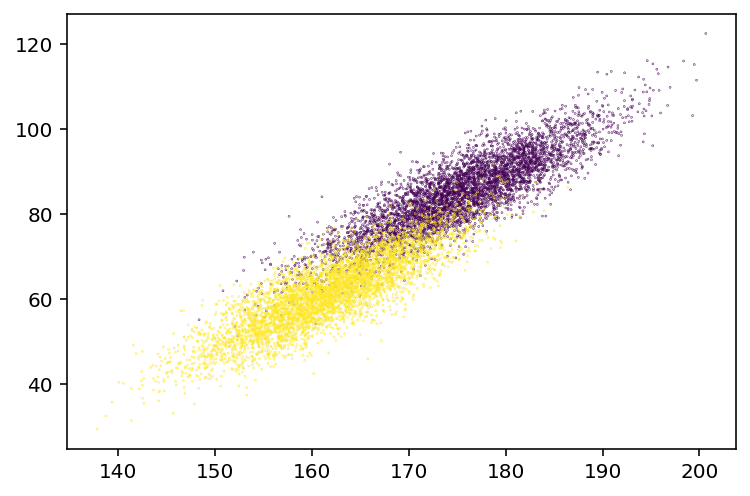

In [6]:
# 남성(0)은 갈색, 여성(1)은 노란색
plt.scatter(df.Height,df.Weight,c=df.Gender,s=0.05)

##  성별  분류
- X: 키와 몸무게 (2개의 특성을 사용)
- y: 성별 (남여를 구분하는 이진 분류 문제)

In [7]:
X = df[["Height", "Weight"]]
y = df.Gender

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 선형 분류 모델

In [9]:
model = SGDClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.8504

### 결정 트리 모델

In [10]:
model = DecisionTreeClassifier() # (1) 모델 생성
model.fit(X_train, y_train) # (2) 훈련
model.score(X_test, y_test) # (3) 평가 (정확도)

0.8808

In [11]:
def show_clf_result(y_test_sex, y_pred_sex):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [12]:
y_pred = model.predict(X_test)
show_clf_result(y_test, y_pred)

[[1083  142]
 [ 156 1119]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1225
           1       0.89      0.88      0.88      1275

    accuracy                           0.88      2500
   macro avg       0.88      0.88      0.88      2500
weighted avg       0.88      0.88      0.88      2500



### 모델 파라미터

In [ ]:
model.feature_importances_

In [13]:
model.feature_importances_

array([0.13810958, 0.86189042])

In [38]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', 
                        color='b', figsize=(8,6))
    plt.gca().legend_ = None

In [39]:
plot_features_weights(X.columns, model.feature_importances_)

AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

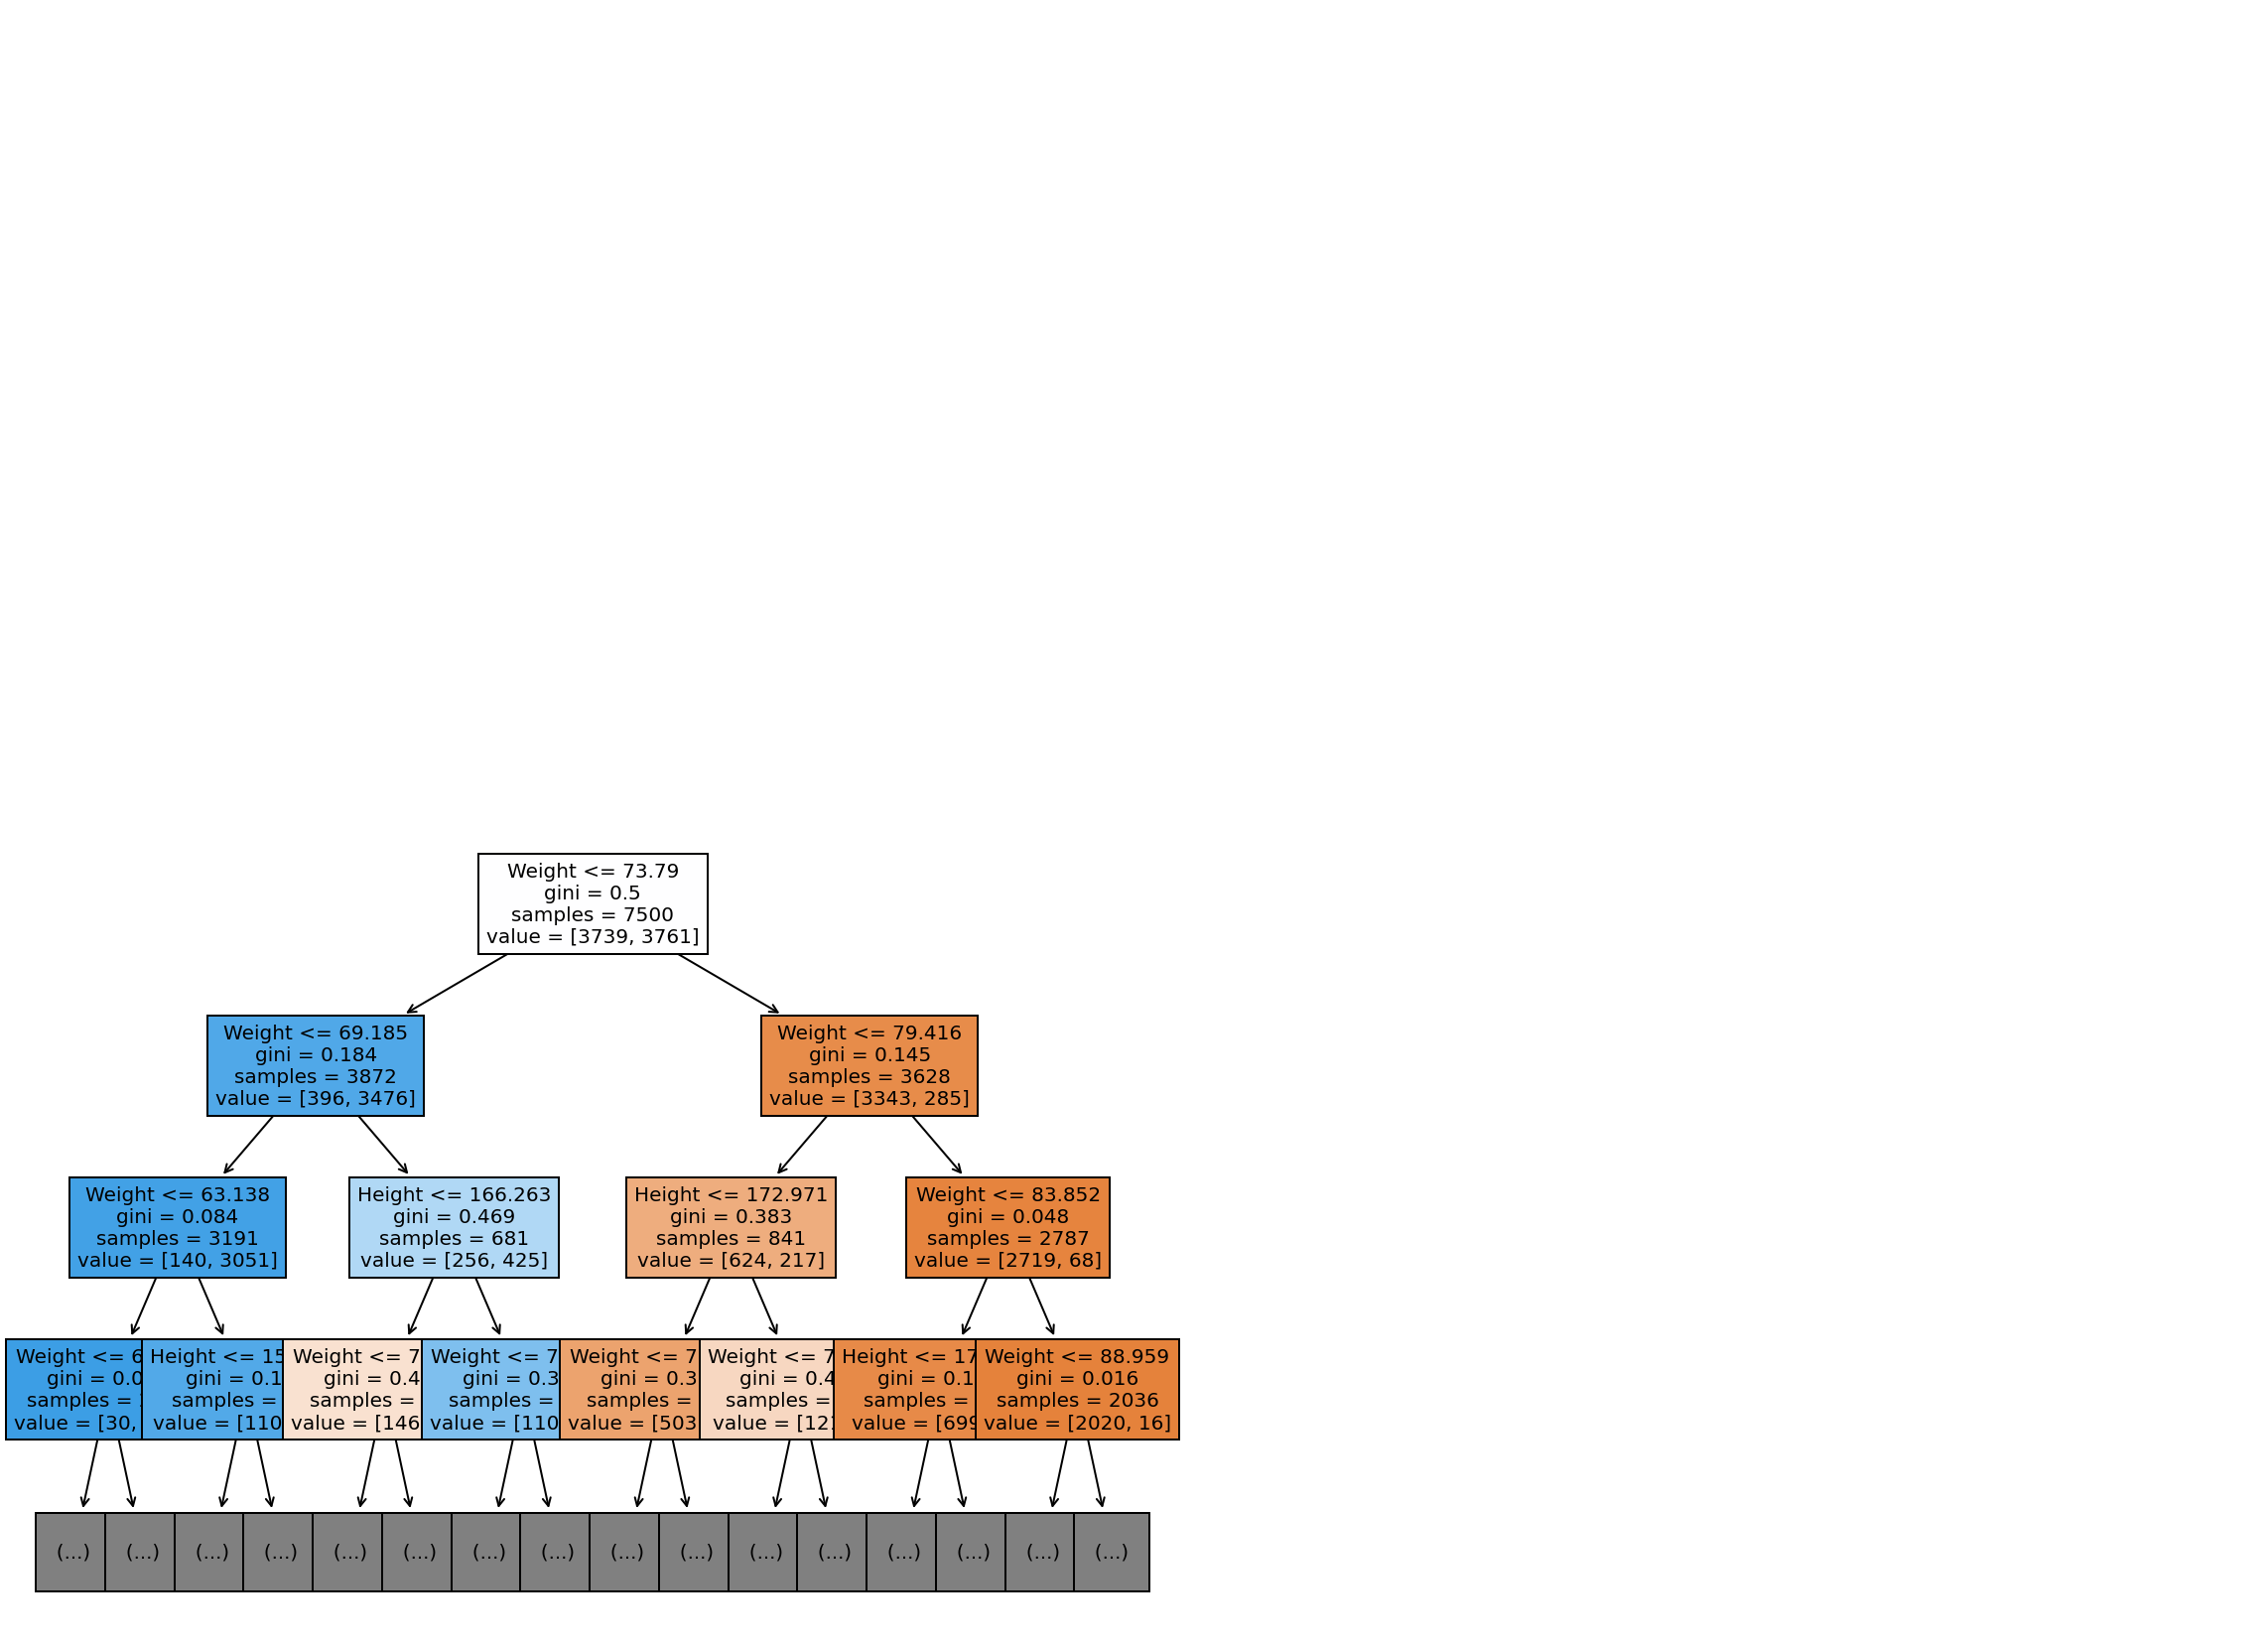

In [16]:
# graphviz
from sklearn import tree
import matplotlib
plt.figure(figsize=(20,15))
tree.plot_tree(model, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

## 회귀

In [15]:
X = df[["Gender", "Height"]]
y = df.Weight.values

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 선형 회귀

In [16]:
model = LinearRegression() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9034498564178676

### 결정 트리 회귀

In [17]:
model = DecisionTreeRegressor() 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7948488805974471

In [19]:
y_pred = model.predict(X_test)
error = y_pred-y_test

print("MAE=", np.abs(error).mean())
print("MAX error =", np.abs(error).max())
from sklearn.metrics import mean_squared_error
print("RMSE=", mean_squared_error(y_test, y_pred, squared=False))

MAE= 5.137797466781156
MAX error = 22.58565412249233
RMSE= 6.488598069930211


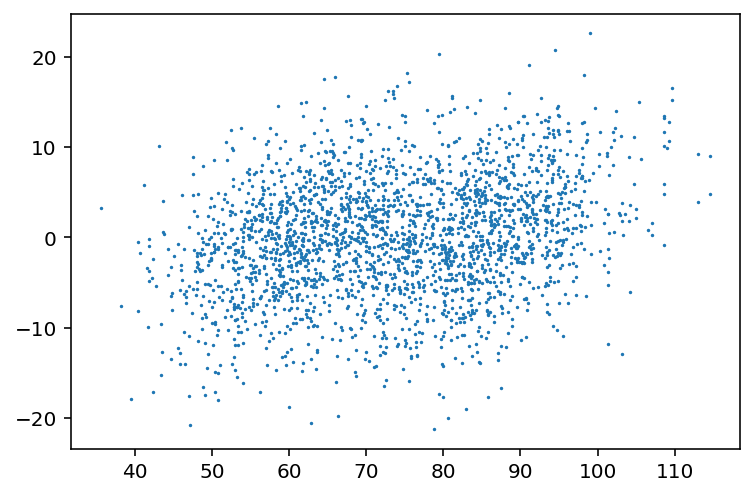

In [22]:
plt.scatter(y_pred, error, s=0.5)

In [23]:
import matplotlib
plt.figure(figsize=(20,15))
tree.plot_tree(model, fontsize=10,
              feature_names=X.columns,
              filled=True,
              impurity=True,
              max_depth=3)
plt.show()

NameError: name 'tree' is not defined

<Figure size 1440x1080 with 0 Axes>

## 엔트로피

- 확률 p인 사건의 가치:  $log$(${1}\over{p}$) 
- 엔트로피=확률x기대치: $Entropy(H)$ = $p$ $log$(${1}\over{p}$)

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.32.23.png?raw=1" align='left'  width=200>


## 크로스 엔트로피 

- 참고: 분류 모델의 손실함수, 즉 학습을 하면서 줄여야 할 대상 값은 크로스 엔트로피를 사용한다
- 분류가 잘 수행될수록 (즉, 분류된 하위 그룹의 p가 1 또는 0으로 수렴할수록) 크로스 엔트로피의 합은 점차 줄어들며 이를 분류의 손실함수로 사용한다
- 계산량을 줄이기 위해서 gini 계수를 사용하기도 한다 (디폴트 값)

<img  src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.11.png?raw=1" align='left'  width=400>

- 엔트로피: 

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.29.58.png?raw=1" align='left'  width=150>

- gini 계수:

$1 - \sum {p_{i}}^2$

# 타이타닉 생존자 예측

In [24]:
data_titanic = pd.read_csv("https://raw.githubusercontent.com/StillWork/data/master/titanic_train.csv")
print(data.shape)
data_titanic[:3]

(10000, 3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
# 사본 사용
df = data_titanic.copy()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 결측치 샘플 삭제
- 항구 데이터(Embarked)는 결측치가 2개 뿐이고 다른 값으로 대체하기가 어려우므로 샘플을 삭제한다

In [26]:
df = df[~df["Embarked"].isnull()]
df.shape

(889, 12)

## 결측치 대체

- Age(나이)는 결측치가 많으나, 의미 있는 정보이므로 삭제하지 않고 다른 값으로 대체한다 (평균치 사용)

In [27]:
# 결측치를 평균 나이로 대체 (대체한 것을 즉시 반영함)
df.Age.fillna(df.Age.mean(), inplace=True)

## 선실등급, 성별, 항구명 원핫 인코딩

In [28]:
df_class = pd.get_dummies(df["Pclass"], prefix="Class")
df_sex = pd.get_dummies(df["Sex"], prefix="Sex")
df_embarked = pd.get_dummies(df["Embarked"], prefix="Embarked")

## 특성 컬럼 취합

In [29]:
# 사용할 아나로그 변수 컬럼들을 먼저 선택한다
X = df[['Age', 'SibSp', 'Parch', 'Fare',]]
X[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [30]:
# 요금은 로그 변환한 값을 사용한다 (오류 발생을 피하기 위해서 작은 값을 더해준다)
X.Fare = np.log(X.Fare +0.1)

/Users/hwa-kim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙인다 (axis=1)
X = pd.concat([X, df_embarked, df_class, df_sex], axis=1)
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,1.994700,0,0,1,0,0,1,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,0,1,0
2,26.0,0,0,2.082562,0,0,1,0,0,1,1,0


## 스케일링
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [32]:
# 표준 스케일링 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])

In [33]:
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0


- 목적 변수

In [34]:
y = df.Survived

## 선형 분류

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)
model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7533632286995515

In [55]:
model.coef_

array([[-0.52985485,  0.52854036, -2.32490555]])

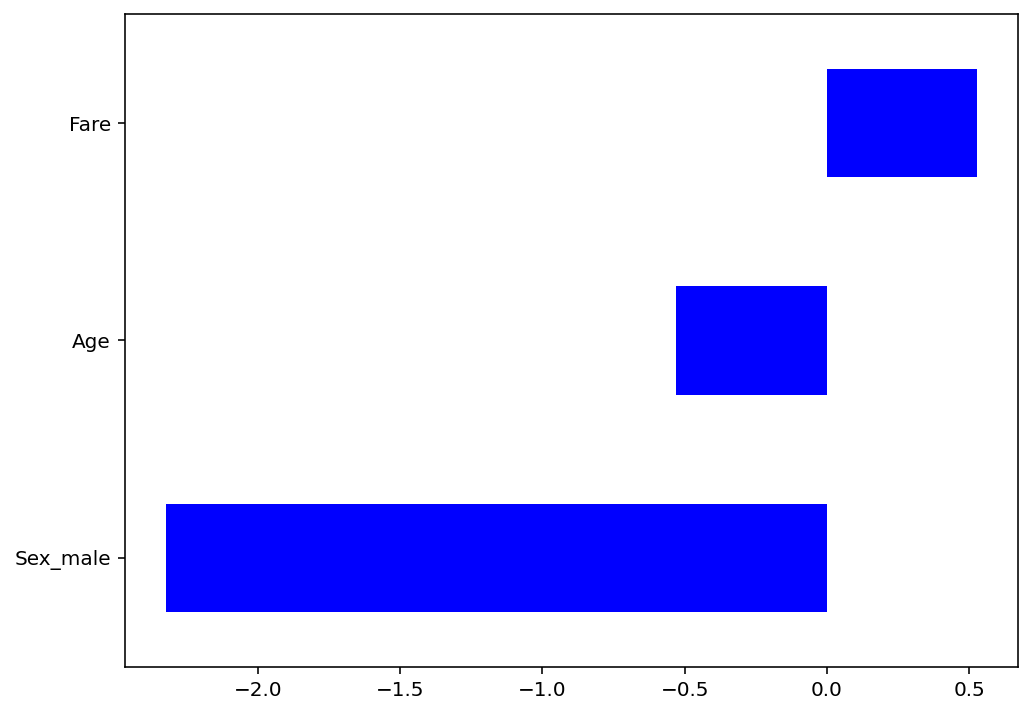

In [56]:
plot_features_weights(X.columns, model.coef_.ravel())

## 결정 트리 분류

In [57]:
model = DecisionTreeClassifier() # 모델 생성
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7309417040358744

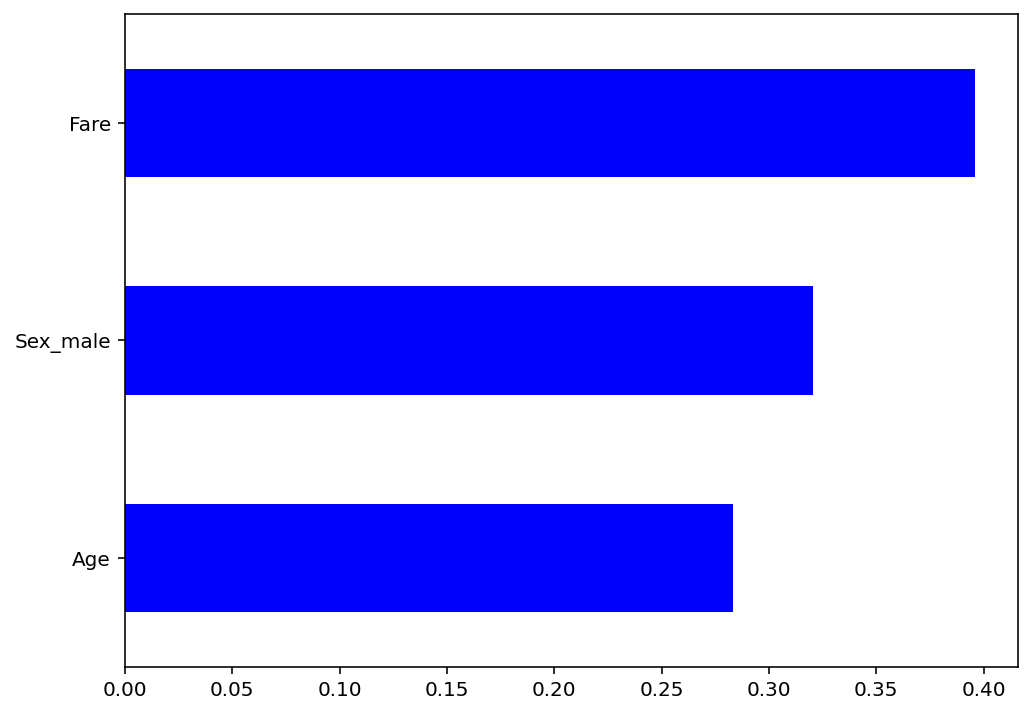

In [58]:
plot_features_weights(X.columns, model.feature_importances_)

## 랜덤 포레스트 분류

In [59]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.757847533632287

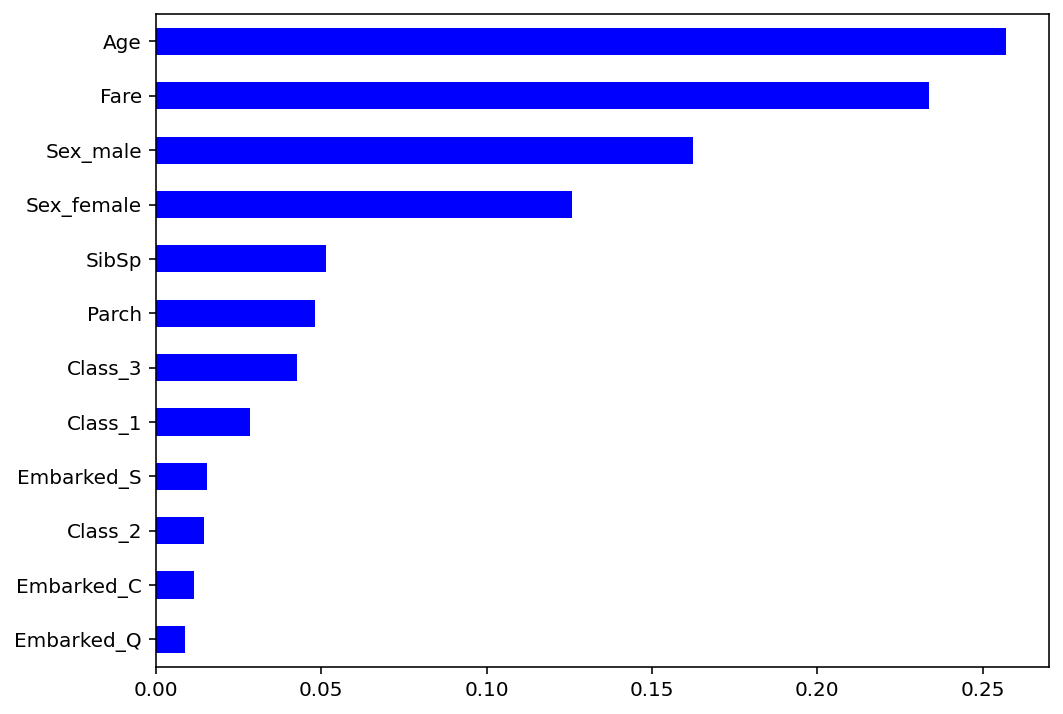

In [44]:
plot_features_weights(X.columns, model.feature_importances_)

In [ ]:
# 과제: X의 특성수(컬럼수)를 3개만 사용할 때 성능비교 선형, DT, RF
# 어떤 3개를 고를때 가장 성능이 좋을 것인가?

In [48]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Class_1', 'Class_2', 'Class_3', 'Sex_female',
       'Sex_male'],
      dtype='object')

In [49]:
features = ['Age', 'Fare', 'Sex_male']
X = X[features]

In [51]:
X

,Age,Fare,Sex_male
0,-5.896199e-01,-0.755613,1
1,6.448480e-01,1.232311,0
2,-2.810029e-01,-0.678783,0
3,4.133853e-01,0.975220,0
4,4.133853e-01,-0.665268,1
...,...,...,...
886,-2.038487e-01,-0.250263,1
887,-8.210826e-01,0.477197,0
888,-5.482138e-16,0.262609,0
889,-2.810029e-01,0.477197,1
